In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
%matplotlib inline

In [2]:
legit_dataframe = pd.read_csv("legit_websites.csv", header=0)

In [3]:
display(legit_dataframe)

,class,domain
0,legit,plasticbags
1,legit,mzltrack
2,legit,miss-slim
3,legit,myhostingpack
4,legit,download-by-satoshi
...,...,...
337393,legit,studiomonocromo
337394,legit,webdesk
337395,legit,bingtorrent
337396,legit,classicfilmtvcafe


In [4]:
legit_dataframe = legit_dataframe.dropna()
legit_dataframe = legit_dataframe.drop_duplicates()

In [5]:
display(legit_dataframe)

,class,domain
0,legit,plasticbags
1,legit,mzltrack
2,legit,miss-slim
3,legit,myhostingpack
4,legit,download-by-satoshi
...,...,...
337393,legit,studiomonocromo
337394,legit,webdesk
337395,legit,bingtorrent
337396,legit,classicfilmtvcafe


In [6]:
legit_dataframe = legit_dataframe.reindex(np.random.permutation(legit_dataframe.index))
legit_total = legit_dataframe.shape[0]
print('Total Legit domains %d' % legit_total)
display(legit_dataframe)


Total Legit domains 337337


,class,domain
90812,legit,newengen
5467,legit,vip-zona
207157,legit,chauffeur-prive
121550,legit,papoutsomania
244037,legit,lesaffaires
...,...,...
319575,legit,youaresolucky
129726,legit,chivemediagroup
210482,legit,headhair
80421,legit,12kanshu


In [7]:
file_location = "dga_websites.csv"

dga_dataframe = pd.read_csv(file_location, header=0);

In [8]:
display(dga_dataframe)

,class,domain
0,dga,mortiscontrastatim
1,dga,cvyh1po636avyrsxebwbkn7
2,dga,txumyqrubwutbb
3,dga,ixekrihagimau
4,dga,rjyuosmhfnaedlyg
...,...,...
337495,dga,poeguvtsixuriem
337496,dga,fkmmnlmdokedddmn
337497,dga,cwnhlchfhcqrgass
337498,dga,mwxquxbokithpn


In [9]:
dga_dataframe = dga_dataframe.dropna()
dga_dataframe = dga_dataframe.drop_duplicates()

In [10]:

dga_dataframe = dga_dataframe.reindex(np.random.permutation(dga_dataframe.index))
dga_total = dga_dataframe.shape[0]
print('Total DGA domains %d' % dga_total)
display(dga_dataframe)


Total DGA domains 337500


,class,domain
184357,dga,gptiaykokjgyjb
258590,dga,bgcunnsdvktwutyk
43815,dga,yyttnsuiwcymao
13416,dga,study-europe
214869,dga,fldccaffaobedafc
...,...,...
287998,dga,qsgbrwlaesoeji
126257,dga,mabyvik
210895,dga,rbddojivsanxujwoj
53460,dga,animabuseuangeliumpiet


In [11]:
all_domains = pd.concat([legit_dataframe, dga_dataframe], ignore_index=True)

In [12]:
display(all_domains)

,class,domain
0,legit,newengen
1,legit,vip-zona
2,legit,chauffeur-prive
3,legit,papoutsomania
4,legit,lesaffaires
...,...,...
674832,dga,qsgbrwlaesoeji
674833,dga,mabyvik
674834,dga,rbddojivsanxujwoj
674835,dga,animabuseuangeliumpiet


In [13]:
all_domains['length'] = [len(x) for x in all_domains['domain']]

In [14]:
display(all_domains)

,class,domain,length
0,legit,newengen,8
1,legit,vip-zona,8
2,legit,chauffeur-prive,15
3,legit,papoutsomania,13
4,legit,lesaffaires,11
...,...,...,...
674832,dga,qsgbrwlaesoeji,14
674833,dga,mabyvik,7
674834,dga,rbddojivsanxujwoj,17
674835,dga,animabuseuangeliumpiet,22


In [15]:

import math
from collections import Counter

def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]



In [16]:
display(all_domains)

,class,domain,length,entropy
0,legit,newengen,8,1.811278
1,legit,vip-zona,8,3.000000
2,legit,chauffeur-prive,15,3.373557
3,legit,papoutsomania,13,3.026987
4,legit,lesaffaires,11,2.732159
...,...,...,...,...
674832,dga,qsgbrwlaesoeji,14,3.521641
674833,dga,mabyvik,7,2.807355
674834,dga,rbddojivsanxujwoj,17,3.572469
674835,dga,animabuseuangeliumpiet,22,3.413088


In [17]:
import sklearn.ensemble
from sklearn import feature_extraction

In [18]:
file_location = "words.txt"

eng_dataframe = pd.read_csv(file_location, header=0, sep=' ');

In [19]:
eng_dataframe

,words
0,&c
1,'d
2,'em
3,'ll
4,'m
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [20]:
eng_dataframe = eng_dataframe[eng_dataframe['words'].map(lambda x: str(x).isalpha())]

In [21]:
eng_dataframe

,words
45,a
50,aa
51,aaa
52,aah
53,aahed
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [22]:
eng_dataframe = eng_dataframe.applymap(lambda x: str(x).strip().lower())

In [23]:
eng_dataframe = eng_dataframe.dropna()
eng_dataframe = eng_dataframe.drop_duplicates()
eng_dataframe

,words
45,a
50,aa
51,aaa
52,aah
53,aahed
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

legit_websites_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
legit_websites_counts_matrix = legit_websites_char_vectorizer.fit_transform(legit_dataframe['domain'])
legit_websites_dict_counts = legit_websites_counts_matrix.sum(axis=0).getA1()
legit_websites_feature_names = legit_websites_char_vectorizer.get_feature_names()


all_domains['legit_websites_tfidf'] = legit_websites_dict_counts * legit_websites_char_vectorizer.transform(all_domains['domain']).T



eng_word_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
eng_word_counts_matrix = eng_word_char_vectorizer.fit_transform(eng_dataframe['words'])
eng_word_dict_counts = eng_word_counts_matrix.sum(axis=0).getA1()
eng_word_feature_names = eng_word_char_vectorizer.get_feature_names()


all_domains['eng_word_tfidf'] = eng_word_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T


In [25]:
all_domains

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf
0,legit,newengen,8,1.811278,273.157233,269.473684
1,legit,vip-zona,8,3.000000,94.092823,236.820169
2,legit,chauffeur-prive,15,3.373557,233.446100,337.764478
3,legit,papoutsomania,13,3.026987,310.983393,499.345811
4,legit,lesaffaires,11,2.732159,325.881964,329.654688
...,...,...,...,...,...,...
674832,dga,qsgbrwlaesoeji,14,3.521641,55.642905,76.165117
674833,dga,mabyvik,7,2.807355,44.349325,29.979257
674834,dga,rbddojivsanxujwoj,17,3.572469,63.295749,50.885115
674835,dga,animabuseuangeliumpiet,22,3.413088,350.585643,444.221427


<AxesSubplot:xlabel='length'>

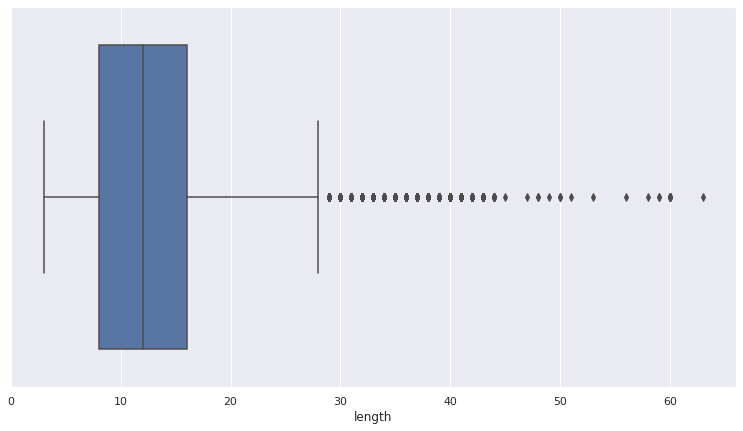

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13,7)})


sns.boxplot(x=all_domains['length'])

<AxesSubplot:xlabel='length', ylabel='Count'>

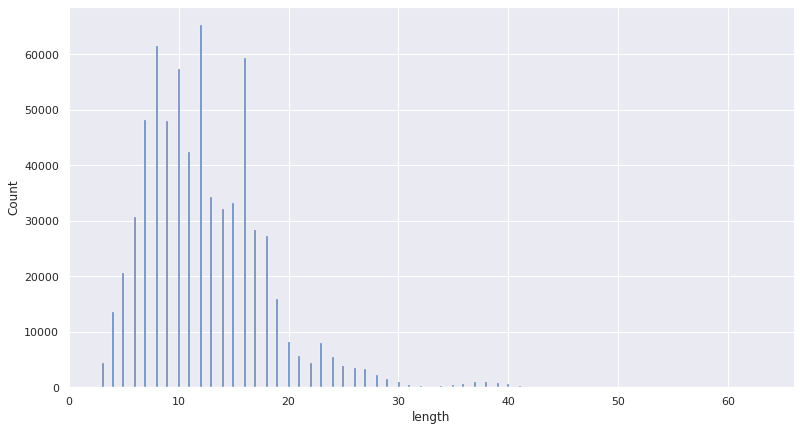

In [27]:
sns.histplot(data=all_domains, x="length")

<AxesSubplot:xlabel='entropy'>

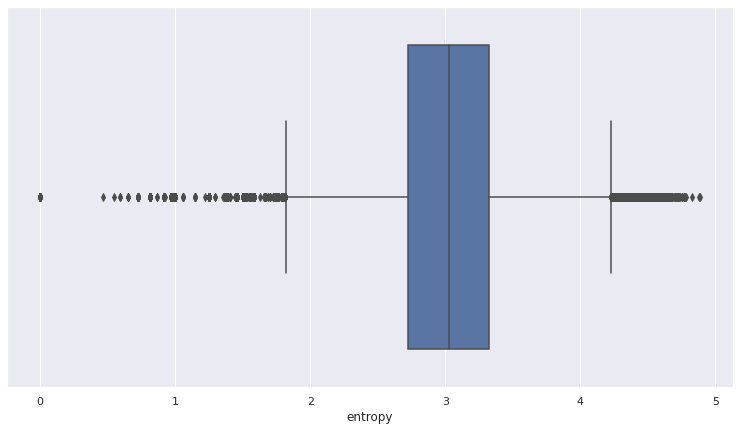

In [28]:
sns.boxplot(x=all_domains['entropy'])

<AxesSubplot:xlabel='entropy', ylabel='Count'>

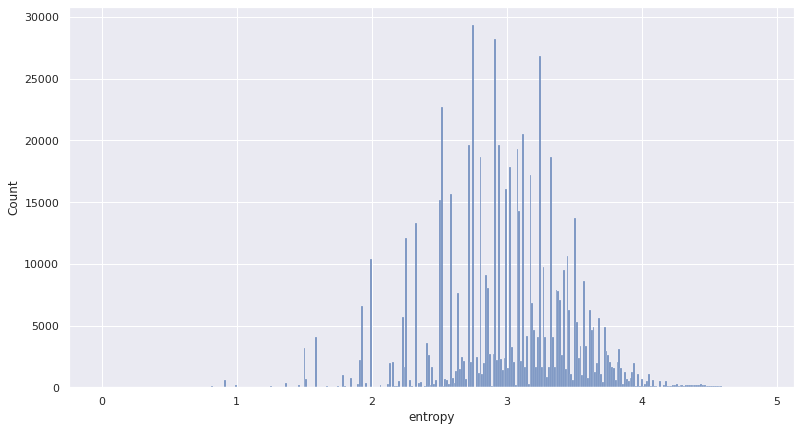

In [29]:
sns.histplot(data=all_domains, x="entropy")

<AxesSubplot:xlabel='legit_websites_tfidf'>

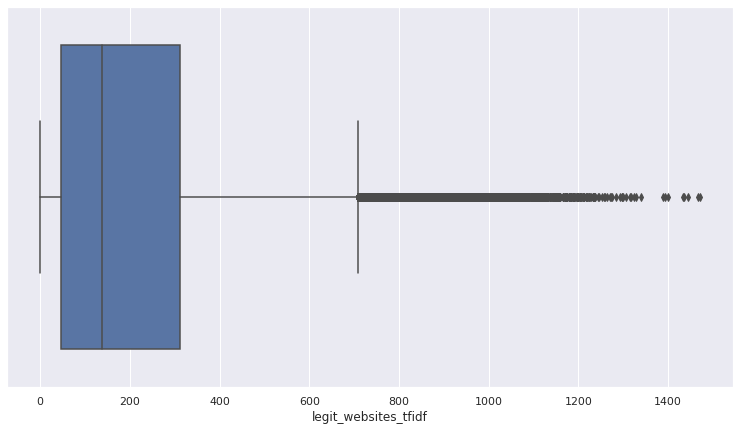

In [30]:
sns.boxplot(x=all_domains['legit_websites_tfidf'])

<AxesSubplot:xlabel='legit_websites_tfidf', ylabel='Count'>

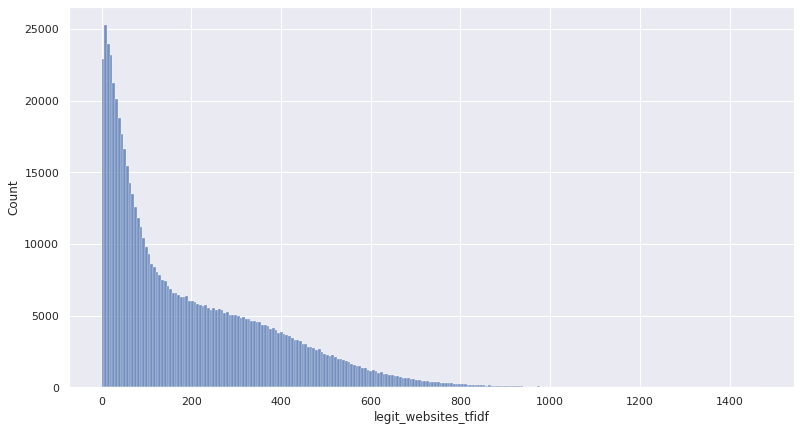

In [31]:
sns.histplot(data=all_domains, x="legit_websites_tfidf")

<AxesSubplot:xlabel='eng_word_tfidf'>

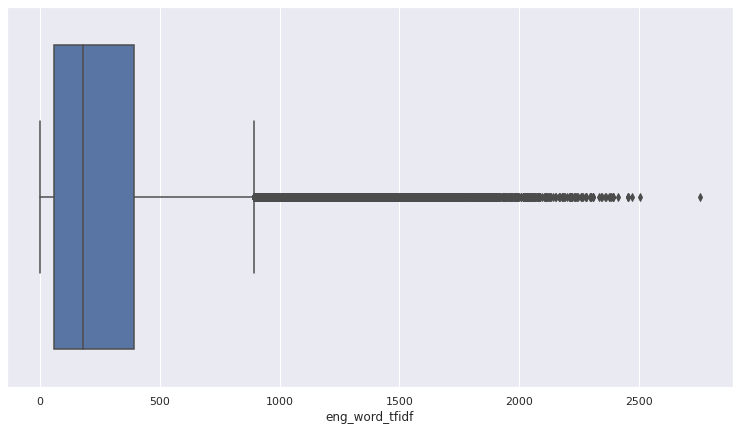

In [32]:
sns.boxplot(x=all_domains['eng_word_tfidf'])

<AxesSubplot:xlabel='eng_word_tfidf', ylabel='Count'>

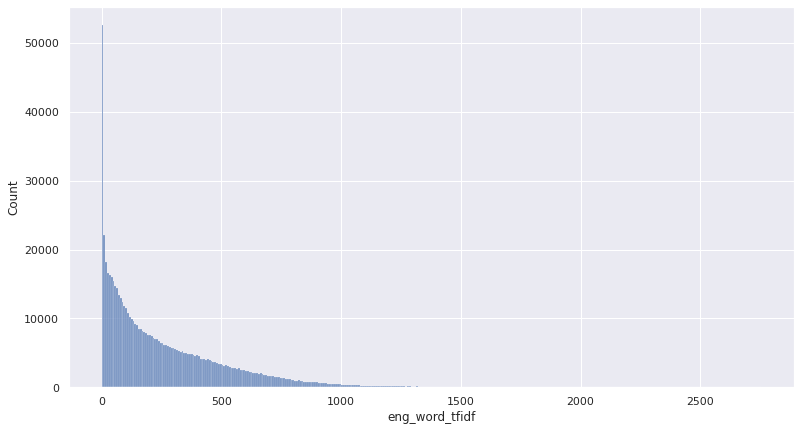

In [33]:
sns.histplot(data=all_domains, x="eng_word_tfidf")

In [34]:

def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] <= low_limit) | (dataframe[col_name] >= up_limit))]
    return df_without_outliers


all_domains = remove_outlier(all_domains, 'length')
all_domains = remove_outlier(all_domains, 'entropy')
all_domains = remove_outlier(all_domains, 'legit_websites_tfidf')
all_domains = remove_outlier(all_domains, 'eng_word_tfidf')



<AxesSubplot:xlabel='length'>

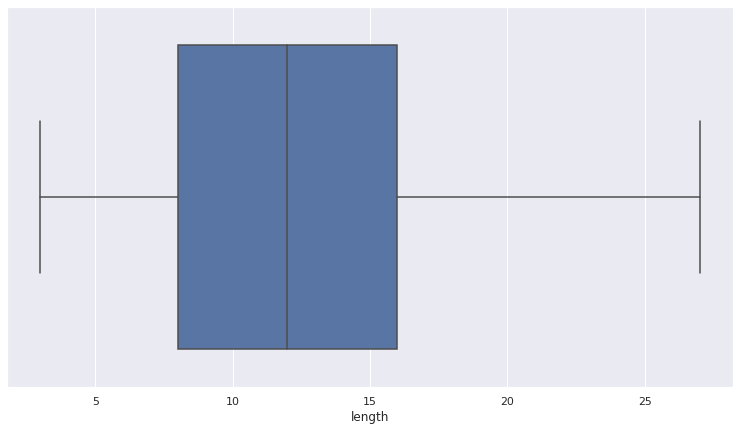

In [36]:
sns.boxplot(x=all_domains['length'])

<AxesSubplot:xlabel='length', ylabel='Count'>

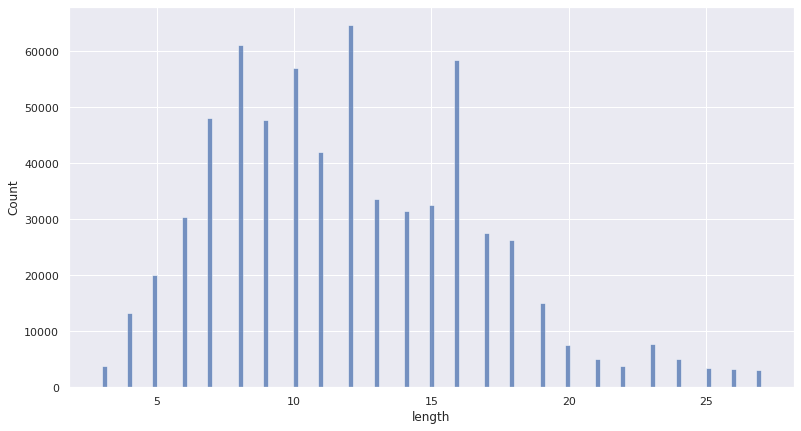

In [37]:
sns.histplot(data=all_domains, x="length")

<AxesSubplot:xlabel='entropy'>

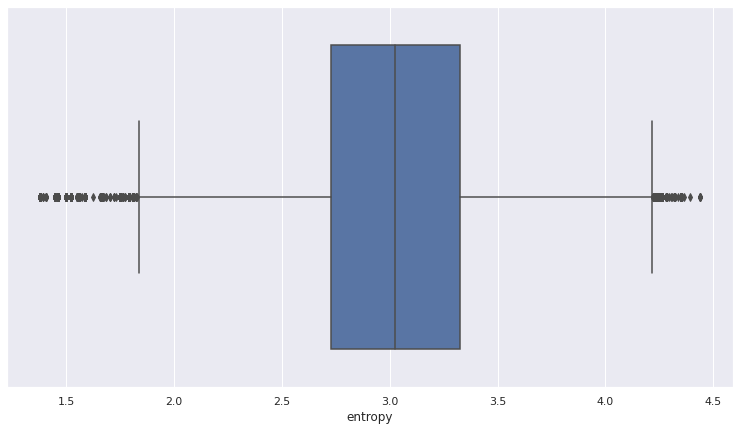

In [38]:
sns.boxplot(x=all_domains['entropy'])

<AxesSubplot:xlabel='entropy', ylabel='Count'>

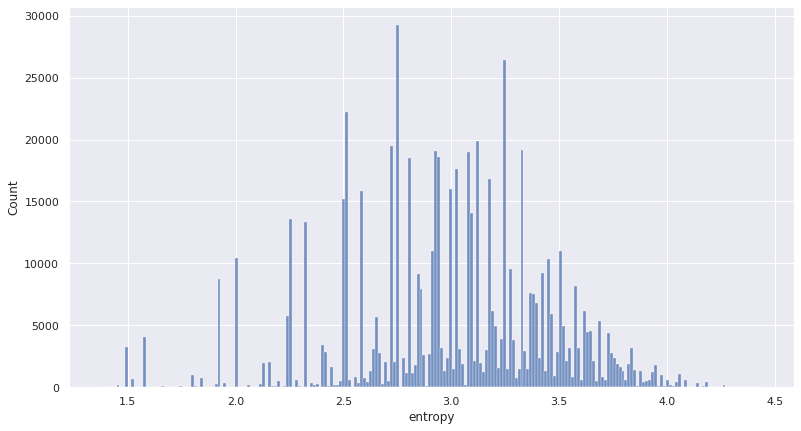

In [39]:
sns.histplot(data=all_domains, x="entropy")

<AxesSubplot:xlabel='legit_websites_tfidf'>

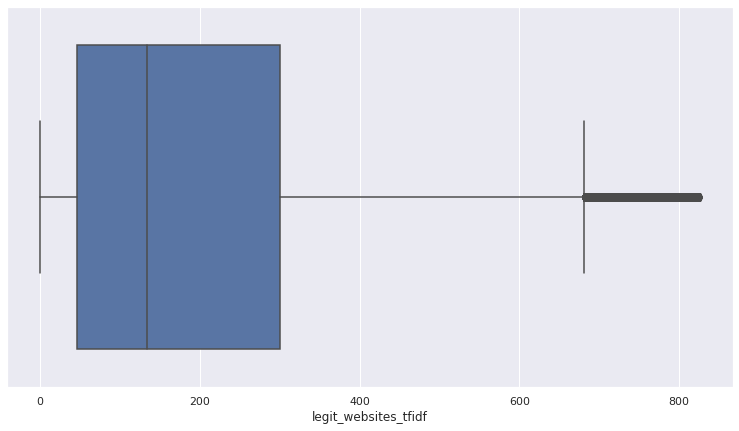

In [40]:
sns.boxplot(x=all_domains['legit_websites_tfidf'])

<AxesSubplot:xlabel='legit_websites_tfidf', ylabel='Count'>

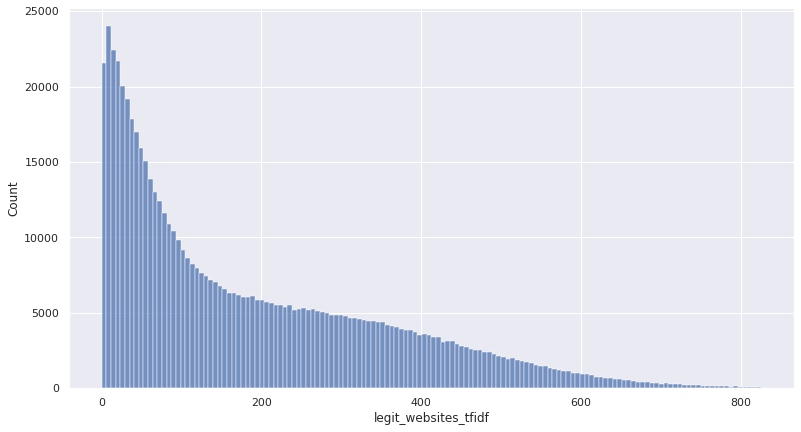

In [41]:
sns.histplot(data=all_domains, x="legit_websites_tfidf")

<AxesSubplot:xlabel='eng_word_tfidf'>

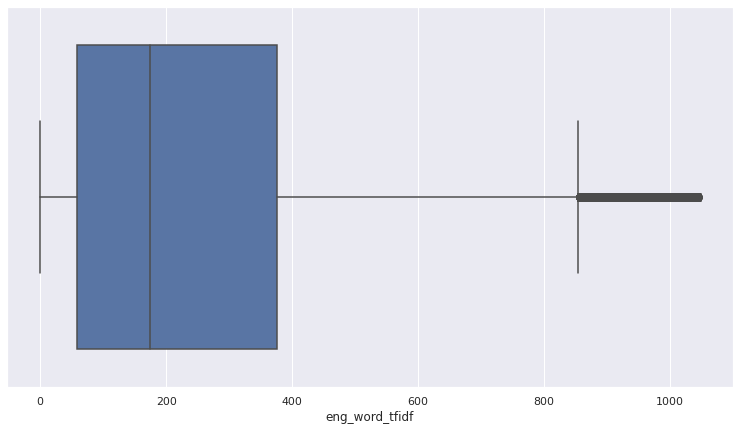

In [42]:
sns.boxplot(x=all_domains['eng_word_tfidf'])

<AxesSubplot:xlabel='eng_word_tfidf', ylabel='Count'>

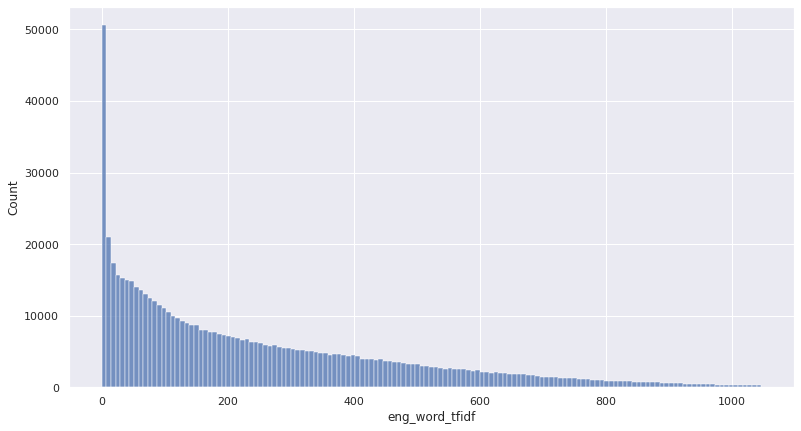

In [43]:
sns.histplot(data=all_domains, x="eng_word_tfidf")

In [44]:
all_domains.groupby('class').agg({'length':['mean', 'min', 'max']})

length        
            mean min max
class                   
dga    13.462319   4  27
legit  10.567697   3  27

In [45]:
all_domains.groupby('class').agg({'entropy':['mean', 'min', 'max']})

entropy                    
           mean       min       max
class                              
dga    3.131282  1.378783  4.436605
legit  2.846514  1.378783  4.392747

In [46]:
all_domains.groupby('class').agg({'legit_websites_tfidf':['mean', 'min', 'max']})

legit_websites_tfidf                 
                      mean  min         max
class                                      
dga             108.336258  0.0  825.256167
legit           268.546090  1.0  825.722716

In [47]:
all_domains.groupby('class').agg({'eng_word_tfidf':['mean', 'min', 'max']})

eng_word_tfidf                  
                mean  min          max
class                                 
dga       151.326950  0.0  1046.531291
legit     336.810887  0.0  1046.657731

In [48]:
all_domains.loc[all_domains["class"] == "dga", "class"] = 1
all_domains.loc[all_domains["class"] == "legit", "class"] = 0

In [49]:
all_domains

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf
0,0,newengen,8,1.811278,273.157233,269.473684
1,0,vip-zona,8,3.000000,94.092823,236.820169
2,0,chauffeur-prive,15,3.373557,233.446100,337.764478
3,0,papoutsomania,13,3.026987,310.983393,499.345811
4,0,lesaffaires,11,2.732159,325.881964,329.654688
...,...,...,...,...,...,...
674832,1,qsgbrwlaesoeji,14,3.521641,55.642905,76.165117
674833,1,mabyvik,7,2.807355,44.349325,29.979257
674834,1,rbddojivsanxujwoj,17,3.572469,63.295749,50.885115
674835,1,animabuseuangeliumpiet,22,3.413088,350.585643,444.221427


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

X = all_domains[['length', 'entropy', 'legit_websites_tfidf', 'eng_word_tfidf']]
y = np.array(all_domains['class'].tolist())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)*100


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[85991 12215]
 [19906 77664]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     98206
           1       0.86      0.80      0.83     97570

    accuracy                           0.84    195776
   macro avg       0.84      0.84      0.84    195776
weighted avg       0.84      0.84      0.84    195776

0.8359298381824125


In [51]:

import collections, numpy


counter = collections.Counter(y_train)
print(counter)

counter2 = collections.Counter(y_test)
print(counter2)


Counter({0: 229388, 1: 227420})
Counter({0: 98206, 1: 97570})


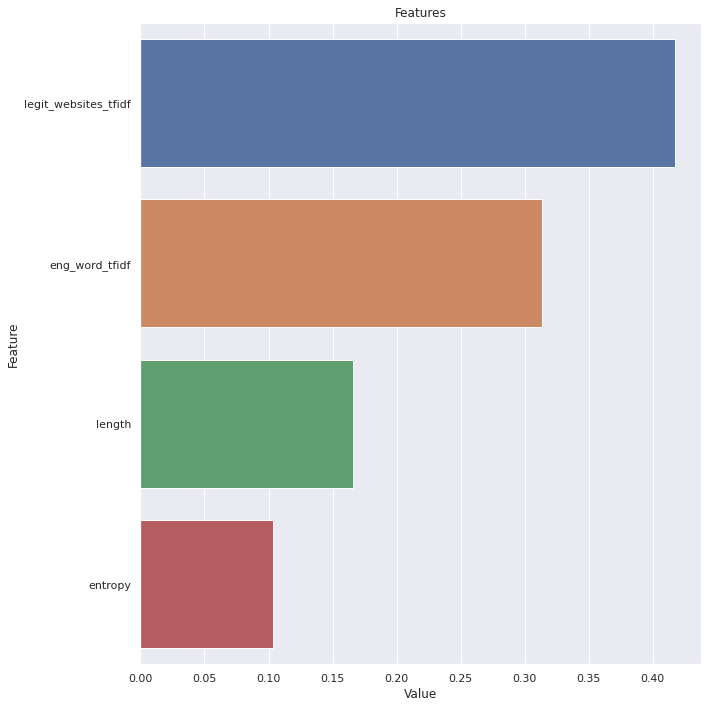

In [52]:

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)


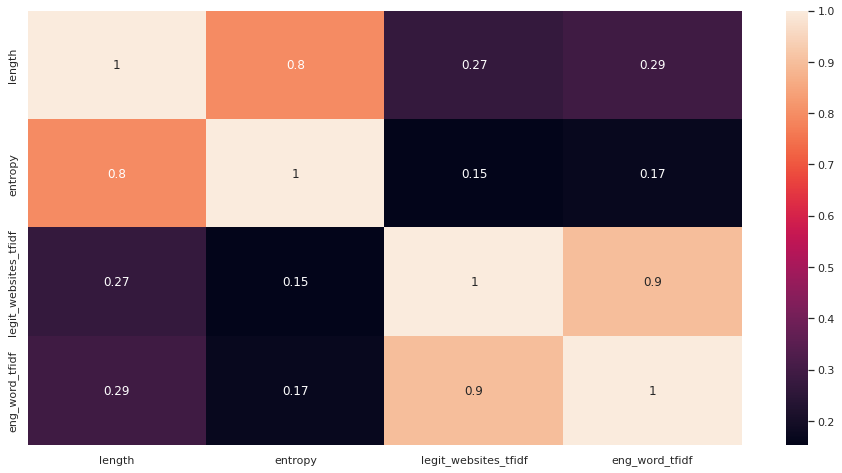

In [53]:
plt.figure(figsize=(16, 8))
corrMatrix = all_domains.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [54]:

def dga_detect(domain):
    legit_websites_tfidf_match = legit_websites_dict_counts * legit_websites_char_vectorizer.transform([domain]).T
    
    eng_word_tfidf_match = eng_word_dict_counts * eng_word_char_vectorizer.transform([domain]).T
    
    _X = [len(domain), entropy(domain), legit_websites_tfidf_match, eng_word_tfidf_match]
    

    return str(rf_model.predict([_X])[0])

print(dga_detect('miuul'))


0


In [55]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_model.score(X_test,y_test)*100


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[82990 15341]
 [19369 78076]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     98331
           1       0.84      0.80      0.82     97445

    accuracy                           0.82    195776
   macro avg       0.82      0.82      0.82    195776
weighted avg       0.82      0.82      0.82    195776

0.8227055410264792


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_model.score(X_test,y_test)*100


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[84079 13766]
 [20889 77042]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     97845
           1       0.85      0.79      0.82     97931

    accuracy                           0.82    195776
   macro avg       0.82      0.82      0.82    195776
weighted avg       0.82      0.82      0.82    195776

0.822986474338019
